### Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [4]:
# Imports 

# Imports para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os
import cv2
import itertools
import shutil
import imageio
import skimage
import skimage.io
import skimage.transform
from pathlib import Path

# Imports para Deep Learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_accuracy

# Imports para cálculo de métricas e outras tarefas
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Júlio Monteiro" --iversions

Author: Júlio Monteiro

skimage   : 0.19.1
tensorflow: 2.3.1
imageio   : 2.13.5
keras     : 2.3.1
matplotlib: 3.3.4
numpy     : 1.18.5
sklearn   : 1.0.2
pandas    : 1.0.3
sys       : 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
cv2       : 4.5.5



###  Construção do Modelo

### Diretórios

In [6]:
dados_treino = 'dataset/dados_treino/'
dados_val = 'dataset/dados_val/'
dados_test = 'dataset/dados_test/'

Variáveis para definir as amostras nos batches de dados.

In [7]:
# Número de exemplos de treinamento
num_amostras_treino = 2034

# Número de exemplos de validação
num_amostras_val = 120

# Tamanho do batch de treino
batch_size_treino = 8

# Tamanho do batch de validação
batch_size_val = 8

Passos de treino e validação.

In [8]:
# Aqui definimos o número de passos
passos_treino = np.ceil(num_amostras_treino / batch_size_treino)
passos_val = np.ceil(num_amostras_val / batch_size_val)

In [9]:
# Quantidade
print(passos_treino)
print(passos_val)

255.0
15.0


Geramos os batches de dados para treino, validação e teste.

In [10]:
# Aqui geramos os batches de dados
datagen = ImageDataGenerator(rescale = 1.0/255)

# Gera os batches de treino
gen_treino = datagen.flow_from_directory(dados_treino,
                                         target_size = (256,256),
                                         batch_size = batch_size_treino,
                                         class_mode = 'categorical')

# Gera os batches de validação
gen_val = datagen.flow_from_directory(dados_val,
                                      target_size = (256,256),
                                      batch_size = batch_size_val,
                                      class_mode = 'categorical')

# Gera os batches de teste
# Nota: shuffle = False faz com que o conjunto de dados de teste não seja "embaralhado"
gen_teste = datagen.flow_from_directory(dados_test,
                                        target_size = (256,256),
                                        batch_size = 1,
                                        class_mode = 'categorical',
                                        shuffle = False)

Found 2034 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


### Hiperparâmetros

Definimos os hiperparâmetros que serão usados para treinar o modelo. Esses valores podem ser modificados para ajustar o modelo e tentar obter melhor precisão.

In [55]:
# Tamanho do kernel
kernel_size = (3,3)

# Tamanho do Pool
pool_size = (2,2)

# Número de neurônios da primeira camada
num_neurons_1 = 32

# Número de neurônios da segunda camada
num_neurons_2 = 32

# Número de neurônios da terceira camada
#num_neurons_3 = 64

# Taxa de dropout nas camadas de convolução
dropout_conv = 0.4

# Taxa de dropout na camada densa
dropout_dense = 0.4

# Taxa de aprendizado
taxa_aprendizado = 0.00001

# Número de épocas de treinamento
num_epochs = 100

### Arquitetura 

Aqui está a arquitetura do modelo. Definimos o número de camadas e a função de ativação usada.

Cada problema requer uma arquitetura diferente.

In [56]:
# Arquitetura do Modelo

# Cria a sequência de camadas
model = Sequential()

# Adicionamos a primeira camada convolucional com 3 operações de convolução
# Por que input_shape tem apenas 3 dimensões? Porque iremos alimentar uma imagem por vez durante o treinamento.
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu', input_shape = (256, 256, 3)))
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

# Adicionamos a segunda camada convolucional com 3 operações de convolução
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

# Adicionamos a terceira camada convolucional com 3 operações de convolução
#model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
#model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
#model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
#model.add(MaxPooling2D(pool_size = pool_size))
#model.add(Dropout(dropout_conv))

# Camada de "achatamento"
model.add(Flatten())

# Camada densa com dropout
model.add(Dense(64, activation = "relu"))
model.add(Dropout(dropout_dense))

# Camada de saída
model.add(Dense(2, activation = "softmax"))

# Sumário do modelo
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 123, 123, 32)      9248      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 121, 121, 32)     

### Compilação

In [57]:
# Compilação do modelo
model.compile(Adam(taxa_aprendizado), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'], 
              sample_weight_mode = None)

### Checkpoint

In [58]:
# Definimos um checkpoint para verificar regularmente se a perda em validação diminuiu
# Se a performance melhorar em validação salvamos o modelo
# Podemos ainda optar por salvar o modelo a cada número de épocas
checkpoint = ModelCheckpoint('modelos/modelo_raiox.h5', 
                             monitor = 'val_loss', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'min')

Uma boa estratégia é reduzir a taxa de aprendizado de forma gradativa, sempre que o modelo parar de aprender.

In [59]:
# Redução gradual da taxa de aprendizado (Reduce on Plateau)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.5, 
                              patience = 5, 
                              verbose = 1, 
                              mode = 'min', 
                              min_lr = 0.000001)

In [60]:
# Cria os callbacks que serão usados no treinamento
callbacks_list = [checkpoint, reduce_lr]

### Treinamento do Modelo

In [61]:
# Treinamento do modelo
history = model.fit(gen_treino, 
                    steps_per_epoch = passos_treino, 
                    validation_data = gen_val,
                    validation_steps = passos_val,
                    epochs = num_epochs, 
                    verbose = 1,
                    callbacks = callbacks_list)

Epoch 1/100
254/255 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5262
Epoch 00001: val_loss improved from inf to 0.69115, saving model to modelos/modelo_raiox.h5
255/255 [==============================] - 9s 36ms/step - loss: 0.6919 - accuracy: 0.5246 - val_loss: 0.6912 - val_accuracy: 0.5083
Epoch 2/100
254/255 [============================>.] - ETA: 0s - loss: 0.6708 - accuracy: 0.6051
Epoch 00002: val_loss improved from 0.69115 to 0.67645, saving model to modelos/modelo_raiox.h5
255/255 [==============================] - 9s 35ms/step - loss: 0.6706 - accuracy: 0.6062 - val_loss: 0.6764 - val_accuracy: 0.6833
Epoch 3/100
254/255 [============================>.] - ETA: 0s - loss: 0.6441 - accuracy: 0.6283
Epoch 00003: val_loss improved from 0.67645 to 0.66272, saving model to modelos/modelo_raiox.h5
255/255 [==============================] - 9s 35ms/step - loss: 0.6443 - accuracy: 0.6278 - val_loss: 0.6627 - val_accuracy: 0.6250
Epoch 4/100
255/255 [========

254/255 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8539
Epoch 00054: val_loss did not improve from 0.44471
255/255 [==============================] - 9s 35ms/step - loss: 0.3359 - accuracy: 0.8540 - val_loss: 0.4551 - val_accuracy: 0.8000
Epoch 55/100
254/255 [============================>.] - ETA: 0s - loss: 0.3295 - accuracy: 0.8623
Epoch 00055: val_loss did not improve from 0.44471
255/255 [==============================] - 8s 33ms/step - loss: 0.3300 - accuracy: 0.8614 - val_loss: 0.4466 - val_accuracy: 0.8083
Epoch 56/100
254/255 [============================>.] - ETA: 0s - loss: 0.3416 - accuracy: 0.8578
Epoch 00056: val_loss did not improve from 0.44471
255/255 [==============================] - 9s 35ms/step - loss: 0.3411 - accuracy: 0.8584 - val_loss: 0.4472 - val_accuracy: 0.8083
Epoch 57/100
255/255 [==============================] - ETA: 0s - loss: 0.3356 - accuracy: 0.8555
Epoch 00057: val_loss did not improve from 0.44471

Epoch 00057: ReduceL

Epoch 83/100
254/255 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.8722
Epoch 00083: val_loss did not improve from 0.44386
255/255 [==============================] - 9s 34ms/step - loss: 0.3126 - accuracy: 0.8717 - val_loss: 0.4452 - val_accuracy: 0.8083
Epoch 84/100
254/255 [============================>.] - ETA: 0s - loss: 0.3093 - accuracy: 0.8722
Epoch 00084: val_loss did not improve from 0.44386
255/255 [==============================] - 9s 35ms/step - loss: 0.3089 - accuracy: 0.8727 - val_loss: 0.4515 - val_accuracy: 0.8000
Epoch 85/100
254/255 [============================>.] - ETA: 0s - loss: 0.3127 - accuracy: 0.8608
Epoch 00085: val_loss did not improve from 0.44386
255/255 [==============================] - 9s 35ms/step - loss: 0.3137 - accuracy: 0.8604 - val_loss: 0.4502 - val_accuracy: 0.8000
Epoch 86/100
254/255 [============================>.] - ETA: 0s - loss: 0.3134 - accuracy: 0.8643
Epoch 00086: val_loss did not improve from 0.44386
255/255 

In [62]:
# Obtém os nomes das métricas do modelo
model.metrics_names

['loss', 'accuracy']

In [63]:
# Carregamos o modelo treinado
model =  tensorflow.keras.models.load_model('modelos/modelo_raiox.h5')

In [64]:
# Extraímos as métricas de treinamento
val_loss, val_acc = model.evaluate(gen_val, steps = passos_val)

15/15 [==============================] - 0s 32ms/step - loss: 0.4439 - accuracy: 0.8083


In [65]:
# Imprimimos
print('\nErro do Modelo em Validação (val_loss):', val_loss)
print('Acurácia do Modelo em Validação (val_acc):', val_acc)


Erro do Modelo em Validação (val_loss): 0.4438634514808655
Acurácia do Modelo em Validação (val_acc): 0.8083333373069763


Vamos visualizar a curva de aprendizado.

In [66]:
# Extrai as métricas
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

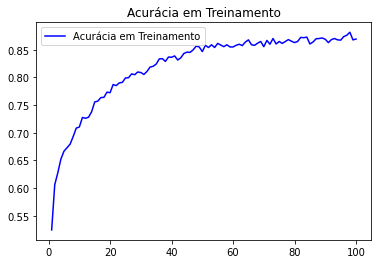

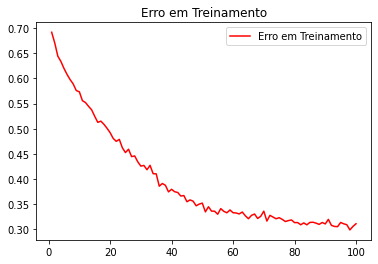

<Figure size 432x288 with 0 Axes>

In [67]:
# Plot

plt.plot(epochs, acc, '-', label = 'Acurácia em Treinamento', color = 'blue')
plt.title('Acurácia em Treinamento')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-', label = 'Erro em Treinamento', color = 'red')
plt.title('Erro em Treinamento')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

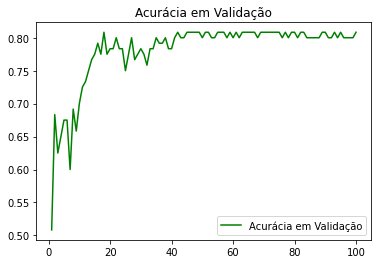

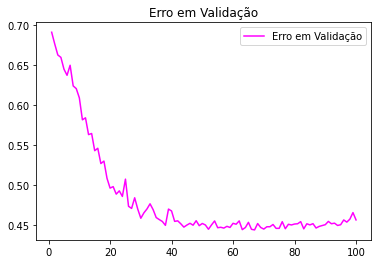

<Figure size 432x288 with 0 Axes>

In [68]:
# Plot

plt.plot(epochs, val_acc, '-', label = 'Acurácia em Validação', color = 'green')
plt.title('Acurácia em Validação')
plt.legend()
plt.figure()

plt.plot(epochs, val_loss, '-', label = 'Erro em Validação', color = 'magenta')
plt.title('Erro em Validação')
plt.legend()
plt.figure()